<a href="https://colab.research.google.com/github/elliotpaquette/Math447stuff/blob/main/IsingGlauber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run Glauber dynamics at inverse temperature $\beta$.
The edges of the block are taken to be frozen at +1 or -1.

In [ ]:
def runGlauber(Sigma, beta, steps):
  m,n = Sigma.shape
  for j in range(steps):
    a = np.random.randint(0,m)
    b = np.random.randint(0,n)

    S = 0
  
    if a == 0: #we chose the top edge
      if b > n//2:
        S += 1
      else:
        S -= 1
      S += Sigma[1,b]
    elif a == m-1:#we chose the bottom edge
      if b > n//2:
        S += 1
      else:
        S -= 1
      S += Sigma[m-2,b]
    else: #in the middle
      S += Sigma[a-1,b]+Sigma[a+1,b]

    if b == 0: #we chose the left edge
      S -= 1
      S += Sigma[a,1]
    elif b == n-1:#we chose the right edge
      S += 1
      S += Sigma[a,n-2]
    else: #in the middle
      S += Sigma[a,b-1]+Sigma[a,b+1]

    p = np.exp(beta * S)/(np.exp(beta * S) + np.exp(-beta * S))
    
    if np.random.uniform() < p:
      Sigma[a,b]= 1
    else:
      Sigma[a,b]=-1
  return Sigma


Run the above Glauber dynamics from iid uniform initial spins.  Total number of steps run is $steps*epochs$.  They are plotted with pcolormesh.

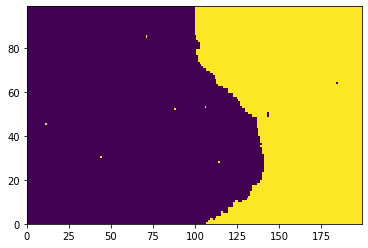

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

m = 100
n = 200
steps = 10000000
epochs = 5
beta = 1
Sigma = 2*np.random.randint(0,2,(m,n))-1
x = np.arange(n)
y = np.arange(m)

fig, ax = plt.subplots()

pmesh = ax.pcolormesh(x, y, Sigma, shading='auto')


Sigmas = []
for j in range(epochs):
  newSigma = runGlauber(Sigma,beta,steps)
  Sigmas.append(Sigma)
  Sigma = newSigma
  plt.pcolormesh(x, y, Sigmas[j])

plt.show()



